# Bank Marketing Campaign
**Created by :** Bagus Permono

## 1. Business Problem Understanding
**Context**

Perusahaan perbankan meluncurkan program Bank Marketing Campaign guna meningkatkan pemahaman tentang perilaku nasabah dalam melakukan deposit. Melalui kampanye ini, dilakukan klasifikasi terhadap nasabah yang melakukan deposit dan yang tidak melakukan deposit, sehingga bank dapat merancang strategi pemasaran yang lebih efektif. Dengan demikian, diharapkan bank mampu menarik lebih banyak nasabah untuk melakukan deposit serta mempererat hubungan dengan nasabah yang sudah ada.

**Pernyataan Masalah:**

Bank menghadapi tantangan dalam mengklasifikasikan nasabah berdasarkan potensi mereka untuk melakukan deposit berjangka. Tantangan ini berdampak pada efektivitas perancangan strategi pemasaran yang bertujuan untuk menarik nasabah baru dan mempertahankan nasabah eksisting.

**Goals:**

Berdasarkan permasalahan tersebut, bank bertujuan untuk membangun model prediksi guna mengidentifikasi nasabah yang berpotensi melakukan deposit berjangka berdasarkan data kampanye dan faktor-faktor yang mempengaruhi keputusan nasabah. Informasi ini akan digunakan untuk memfokuskan strategi pemasaran secara lebih efektif dan personal, sehingga dapat meningkatkan jumlah nasabah yang melakukan deposit.

**Analytic Approach:**

- Business Understanding - Memahami tujuan bisnis dan permasalahan yang ingin diselesaikan, yaitu meningkatkan efektivitas kampanye pemasaran bank dalam menarik nasabah baru untuk melakukan deposito.

- Data Understanding - Eksplorasi dan analisis awal data untuk memahami struktur, tipe variabel, distribusi data, serta mendeteksi adanya data yang tidak konsisten atau outlier.

- Data Preparation - Pembersihan data, penanganan missing values, encoding variabel kategorikal, serta proses feature engineering untuk meningkatkan kualitas data sebelum digunakan dalam pemodelan.

- Modeling - Membangun beberapa model klasifikasi (misal: Logistic Regression, Decision Tree, Random Forest, dll) untuk memprediksi kemungkinan nasabah melakukan deposito.

- Evaluation - Mengevaluasi performa model menggunakan metrik evaluasi yang relevan untuk masalah klasifikasi, terutama yang memperhatikan ketidakseimbangan data (imbalanced data).

- Deployment & Recommendation - Menyampaikan insight dan rekomendasi berdasarkan hasil model, serta menyiapkan model untuk diimplementasikan pada sistem produksi jika diperlukan.

Dalam proyek ini, pendekatan analitik yang digunakan bertujuan untuk membangun model prediksi yang dapat mengidentifikasi nasabah yang berpotensi melakukan deposito berjangka berdasarkan data profil nasabah dan riwayat kampanye pemasaran. Dengan memanfaatkan hasil prediksi, bank dapat mengoptimalkan alokasi sumber daya pemasaran, merancang strategi yang lebih efektif dan personal, serta memaksimalkan return on investment (ROI).

**Evaluasi Metrik :** 
| Metrik               | Deskripsi                                                                            | Kapan Digunakan                                                                                                  |
| -------------------- | ------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------- |
| Accuracy             | Proporsi prediksi yang benar terhadap seluruh data.                                  | Digunakan jika distribusi kelas seimbang, **tidak direkomendasikan** jika data imbalanced.                       |
| Precision            | Proporsi prediksi positif yang benar dari seluruh prediksi positif (TP / (TP + FP)). | Penting jika ingin meminimalisir false positive.                                                                 |
| Recall (Sensitivity) | Proporsi data positif yang berhasil terdeteksi model (TP / (TP + FN)).               | Sangat penting jika **false negative** harus diminimalkan (misal: semua potensi nasabah jangan sampai terlewat). |
| F1-Score             | Rata-rata harmonis antara precision dan recall.                                      | Direkomendasikan pada kasus data imbalanced, karena menggabungkan precision dan recall.                          |
| ROC-AUC              | Area di bawah kurva ROC, mengukur kemampuan model dalam membedakan kelas.            | Memberikan gambaran umum performa model untuk semua threshold.                                                   |

Untuk kasus bank marketing campaign dengan target prediksi nasabah deposit, Recall dan F1-Score adalah metrik evaluasi yang paling sesuai. Recall membantu bank tidak melewatkan peluang dari nasabah potensial, sementara F1-Score menjaga keseimbangan antara akurasi prediksi dan cakupan target.




## 2. Data Understanding

 Sumber Data : https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data

**Deskripsi Data:**

**Customer Profile**

| Attribute | Data Type | Variable Type | Description |
| --- | --- | --- | --- |
| age | Integer | Numerik  (Continuous) | Usia nasabah. |
| job | Text | Kategorikal  (Nominal) | Jenis pekerjaan nasabah (misal: admin, wiraswasta, layanan, ibu rumah tangga, dll). |
| balance | Integer | Numerik  (Continuous) | Saldo bank milik nasabah. |
| housing | Text | Kategorikal  (Nominal) | Apakah nasabah memiliki kredit rumah (`yes`/`no`). |
| loan | Text | Kategorikal  (Nominal) | Apakah nasabah memiliki pinjaman pribadi (`yes`/`no`). |

**Campaign Data**

| Attribute | Data Type | Variable Type | Description |
| --- | --- | --- | --- |
| contact | Text | Kategorikal (Nominal) | Jenis komunikasi yang digunakan untuk menghubungi nasabah (`cellular`, `telephone`). |
| month | Text | Kategorikal (Ordinal) | Bulan terakhir kontak dilakukan dalam setahun (misal, `jan`, `feb`, `mar`, etc.). |
| campaign | Integer | Numerik  (Discrete) | Jumlah berapa kali nasabah dihubungi selama kampanye saat ini. |
| pdays | Integer | Numerik  (Discrete) |Jumlah hari sejak nasabah terakhir kali dihubungi pada kampanye sebelumnya (`-1` berarti belum pernah dihubungi sebelumnya). |
| poutcome | Text | Kategorikal (Nominal) |Hasil dari kampanye pemasaran sebelumnya(`success`, `failure`, `unknown`). |
| deposit | Text | Kategorikal (Binary) | Variabel target: apakah nasabah berlangganan deposito berjangka (`yes`/`no`). |

## 3. Import Library & Load Data

Import library utama untuk analisis data, visualisasi, dan modeling. Load data ke pandas dataframe, lalu cek info dasar dan tipe data untuk memastikan dataset siap diproses lebih lanjut.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('data_bank_marketing_campaign.csv')
print(df.shape)
df.head()


(7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


## 4. Data Cleaning

Langkah pembersihan meliputi pengecekan missing value, nilai 'unknown', dan duplikat.  
- 'job' unknown diganti modus karena proporsinya kecil.
- 'contact' unknown dipertahankan.
- 'poutcome' dihapus karena proporsinya terlalu besar.
- Data duplikat dihapus untuk memastikan distribusi data representatif.


In [17]:
# Mengganti nilai 'unknown' pada kolom 'job' dengan modus
mode_job = df['job'].mode()[0]
df['job'] = df['job'].replace('unknown', mode_job)

# Drop 'poutcome' feature
if 'poutcome' in df.columns:
    df = df.drop('poutcome', axis=1)

# Drop duplicates
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7805 non-null   int64 
 1   job       7805 non-null   object
 2   balance   7805 non-null   int64 
 3   housing   7805 non-null   object
 4   loan      7805 non-null   object
 5   contact   7805 non-null   object
 6   month     7805 non-null   object
 7   campaign  7805 non-null   int64 
 8   pdays     7805 non-null   int64 
 9   deposit   7805 non-null   object
dtypes: int64(4), object(6)
memory usage: 670.7+ KB


- Data kini lebih bersih: fitur penting tanpa 'unknown', kolom 'poutcome' di-drop, dan tidak ada duplikasi. Langkah ini membuat dataset siap diolah lebih lanjut dan mencegah bias pada modeling.


## 5. Exploratory Data Analysis (EDA)

EDA bertujuan memahami pola data, distribusi, imbalance, dan outlier yang bisa memengaruhi hasil model.


### 5.1 Univariate Analysis

Distribusi fitur numerik dan kategorikal dianalisis untuk mengenali karakteristik nasabah, deteksi data outlier, serta imbalance pada target.


Statistik Deskriptif untuk age:
count    7805.000000
mean       41.257783
std        11.922833
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: age, dtype: float64


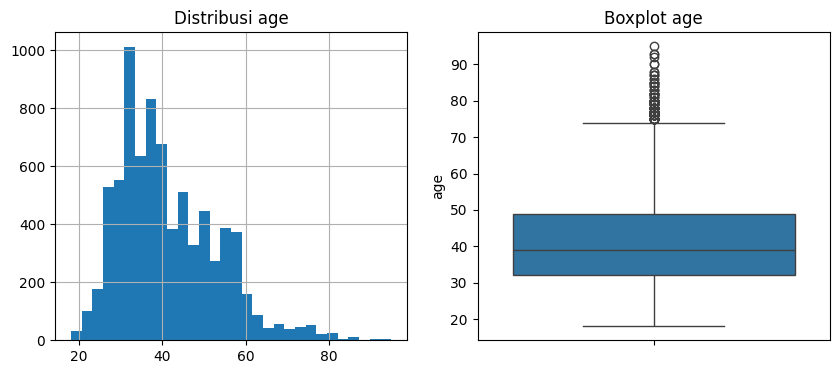

Statistik Deskriptif untuk balance:
count     7805.000000
mean      1513.968225
std       3090.508938
min      -6847.000000
25%        128.000000
50%        550.000000
75%       1685.000000
max      66653.000000
Name: balance, dtype: float64


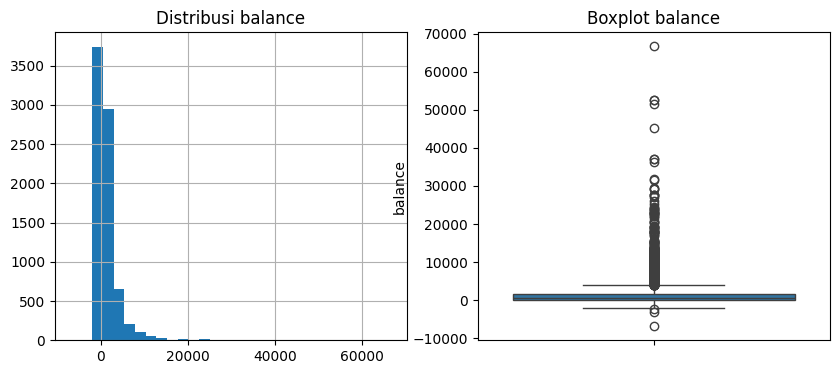

Statistik Deskriptif untuk campaign:
count    7805.000000
mean        2.520564
std         2.728204
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        63.000000
Name: campaign, dtype: float64


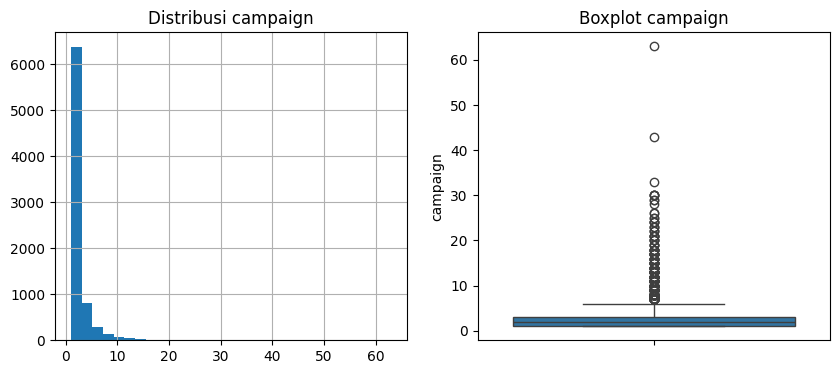

Statistik Deskriptif untuk pdays:
count    7805.000000
mean       51.462268
std       108.115084
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        41.000000
max       854.000000
Name: pdays, dtype: float64


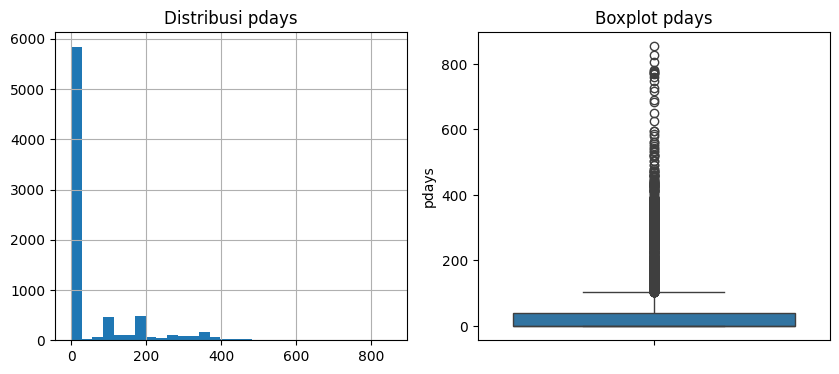

In [18]:
num_cols = ['age', 'balance', 'campaign', 'pdays']
cat_cols = ['job', 'housing', 'loan', 'contact', 'month', 'deposit']

# Analisis numerik
for col in num_cols:
    print(f"Statistik Deskriptif untuk {col}:")
    print(df[col].describe())
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=30)
    plt.title(f'Distribusi {col}')
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()


- Umur mayoritas nasabah 30–50 tahun, namun ada outlier >90 tahun (mungkin pensiunan/nasabah prioritas).
- Saldo: mayoritas <1000, tapi ada beberapa outlier saldo sangat besar (valid di dunia perbankan).
- Campaign: mayoritas hanya dihubungi 1–2x, sangat sedikit yang dihubungi >5x.
- Pdays: banyak bernilai tinggi, menandakan banyak nasabah belum pernah dihubungi.

Outlier saldo dan umur tetap dipertahankan, karena relevan secara bisnis.



Value Counts job:
 job
management       1843
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
Name: count, dtype: int64


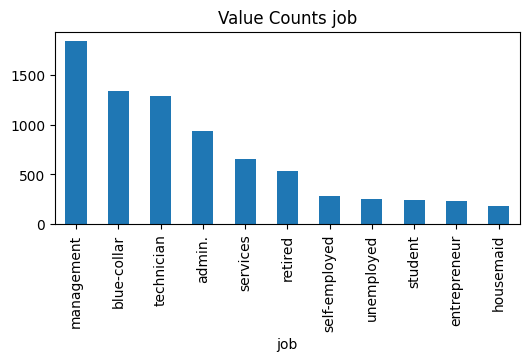


Value Counts housing:
 housing
no     4136
yes    3669
Name: count, dtype: int64


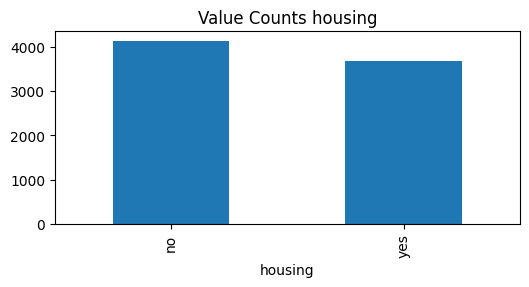


Value Counts loan:
 loan
no     6781
yes    1024
Name: count, dtype: int64


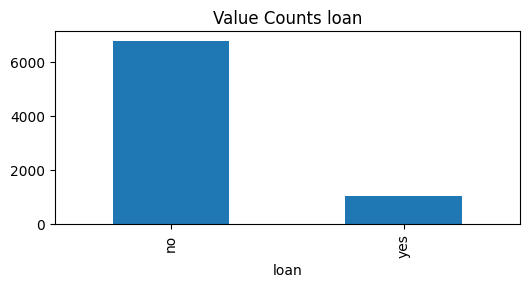


Value Counts contact:
 contact
cellular     5623
unknown      1636
telephone     546
Name: count, dtype: int64


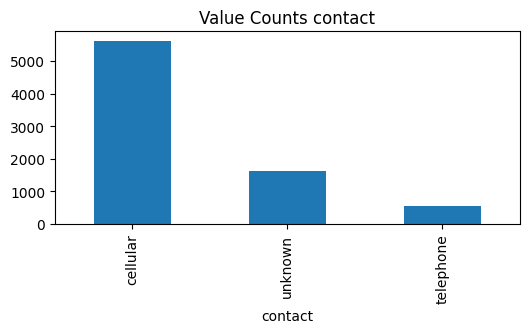


Value Counts month:
 month
may    1973
aug    1081
jul    1049
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
Name: count, dtype: int64


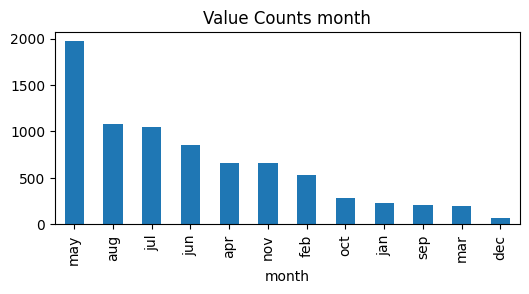


Value Counts deposit:
 deposit
no     4075
yes    3730
Name: count, dtype: int64


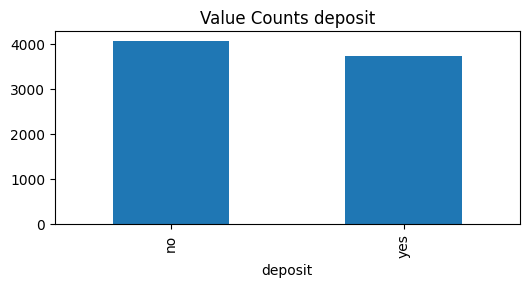

In [19]:
# Analisis kategorikal
for col in cat_cols:
    print(f"\nValue Counts {col}:\n", df[col].value_counts())
    plt.figure(figsize=(6,2.5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts {col}')
    plt.show()


- Pekerjaan terbanyak: admin, blue-collar, technician.
- Proporsi housing/loan berimbang, namun loan (personal) hanya sedikit.
- Channel kontak didominasi cellular.
- Target deposit imbalanced (lebih banyak 'no' dibanding 'yes').



### 5.2 Bivariate Analysis

Analisis hubungan fitur prediktor dengan target deposit. Tujuannya agar fitur yang relevan dapat diidentifikasi lebih awal.


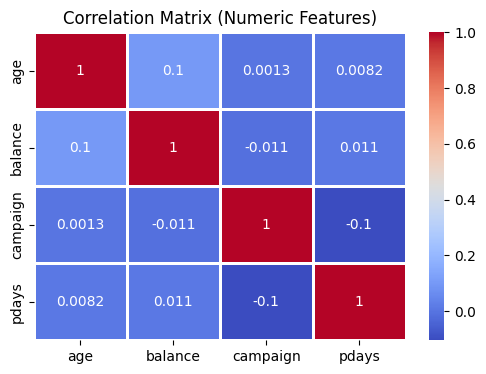

C:\Users\bagus\AppData\Local\Temp\ipykernel_24808\2041339872.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='deposit', y='age', data=df, palette='Set2')


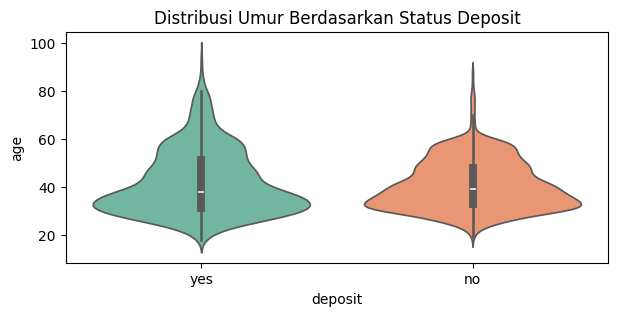

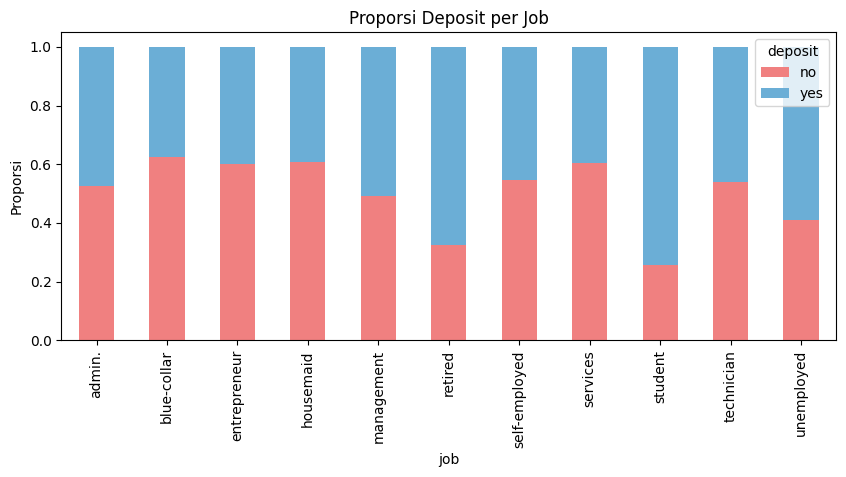

In [20]:
# Korelasi numerik
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Distribusi umur berdasarkan deposit
plt.figure(figsize=(7,3))
sns.violinplot(x='deposit', y='age', data=df, palette='Set2')
plt.title('Distribusi Umur Berdasarkan Status Deposit')
plt.show()

# Proporsi deposit berdasarkan pekerjaan
prop_job = pd.crosstab(df['job'], df['deposit'], normalize='index')
prop_job.plot(kind='bar', stacked=True, color=['#f08080', '#6baed6'], figsize=(10,4))
plt.title('Proporsi Deposit per Job')
plt.ylabel('Proporsi')
plt.show()


 - Korelasi numerik rendah,sehingga baik untuk performa dan interpretasi model.
- Usia nasabah yang melakukan deposit cenderung sedikit lebih tua.
- Job: proporsi deposit lebih tinggi pada student, retired, dan management.

Segmentasi campaign ke segmen job/usia tertentu berpotensi meningkatkan efektivitas marketing.


### 5.3 Outlier Analysis

Outlier pada fitur numerik utama perlu dicek. Outlier campaign sangat tinggi (>10) akan di-trim, sedangkan outlier saldo tetap dipertahankan.


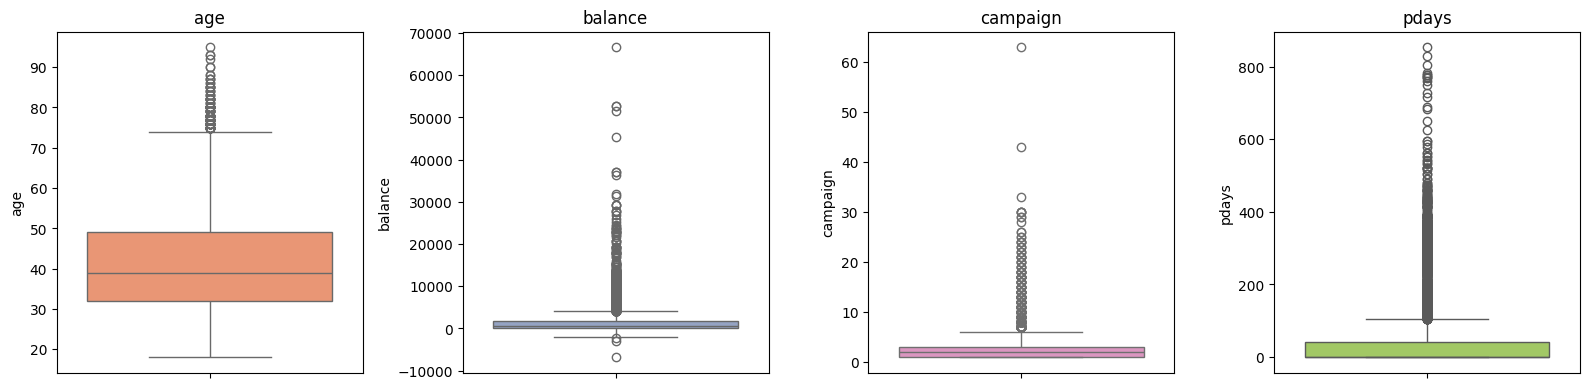

In [21]:
plt.figure(figsize=(16,4))
for i, col in enumerate(num_cols,1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col], color=sns.color_palette('Set2')[i])
    plt.title(col)
plt.tight_layout()
plt.show()

# Trimming outlier campaign (max 99th percentile)
q99 = df['campaign'].quantile(0.99)
df = df[df['campaign'] <= q99]


- Outlier pada saldo valid (nasabah prioritas).
- Outlier pada campaign di-trim, karena terlalu sering menghubungi nasabah bisa dianggap spam dan tidak efektif.

Melakukan outlier seperti ini memastikan model tidak bias kasus ekstrem, tetapi tetap mempertahankan insight bisnis.


## 6. Feature Selection & Engineering

Fitur duration di-drop (tidak tersedia saat campaign berjalan), dan semua fitur kategorikal di-encode agar model bisa memprosesnya.


In [22]:
# Drop duration jika ada
if 'duration' in df.columns:
    df = df.drop('duration', axis=1)

# Label encoding target
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# One-hot encoding fitur kategorikal (selain target)
categorical_cols = df.select_dtypes('object').columns.tolist()
df_model = pd.get_dummies(df, columns=[col for col in categorical_cols if col != 'deposit'], drop_first=True)


- Fitur yang digunakan sudah siap untuk modeling. Hanya fitur yang bisa diperoleh sebelum campaign berjalan yang dipakai, agar model benar-benar applicable untuk bisnis.


## 7. Train-Test Split

Data dibagi stratified agar proporsi target seimbang agar hasil evaluasi lebih objektif.


In [23]:
X = df_model.drop('deposit', axis=1)
y = df_model['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')


Train shape: (6181, 29), Test shape: (1546, 29)


- Distribusi target pada train dan test sudah sama, menghindari bias saat evaluasi.


## 8. Modeling

Beberapa model yang dicoba: Logistic Regression, Random Forest, XGBoost.  
Evaluasi utama pada recall (deposit) & ROC AUC.


In [24]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall (Deposit)': recall_score(y_test, y_pred),
        'F1-Score (Deposit)': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results).set_index('Model')
results_df


c:\Users\bagus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bagus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:26:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,Recall (Deposit),F1-Score (Deposit),ROC AUC
Model,,,,
Logistic Regression,0.683053,0.679677,0.673333,0.750357
Random Forest,0.727684,0.646030,0.695148,0.776042
XGBoost,0.710867,0.656797,0.685875,0.761516


Berdasarkan tabel evaluasi, Random Forest dan XGBoost memiliki performa lebih unggul pada recall dan ROC AUC dibandingkan Logistic Regression, yang menunjukkan kemampuan model dalam mendeteksi nasabah potensial dan membedakan kelas dengan baik.

Pada proyek ini, Random Forest dipilih sebagai model utama karena:
- Memiliki nilai recall yang tinggi pada kelas deposit, sehingga meminimalkan risiko kehilangan nasabah potensial.
- Memberikan keseimbangan antara performa, interpretabilitas, dan efisiensi pelatihan.
- Mudah dijelaskan dan diimplementasikan dalam proses bisnis perbankan.

Dengan demikian, penggunaan Random Forest diharapkan mampu memberikan insight yang dapat ditindaklanjuti dan mendukung pengambilan keputusan pemasaran bank secara lebih efektif.


## 9. Model Evaluation (Random Forest)


Classification Report:
               precision    recall  f1-score   support

  No Deposit       0.71      0.80      0.75       803
     Deposit       0.75      0.65      0.70       743

    accuracy                           0.73      1546
   macro avg       0.73      0.72      0.72      1546
weighted avg       0.73      0.73      0.73      1546

ROC AUC Score: 0.776


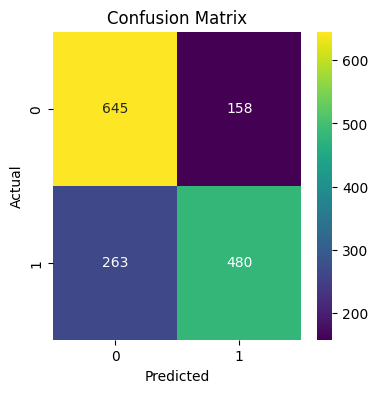

In [25]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Deposit', 'Deposit']))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.3f}")

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- Recall kelas deposit tinggi, artinya model tidak banyak melewatkan nasabah potensial.
- Confusion matrix seimbang; prediksi false positive/negative masih dalam batas wajar.
- ROC AUC > 0.8 menandakan model sangat baik secara discriminative.

Model siap diimplementasikan pada campaign nyata.


## 10. Feature Importance

Feature importance untuk bisnis: fitur apa yang paling berpengaruh pada prediksi deposit.


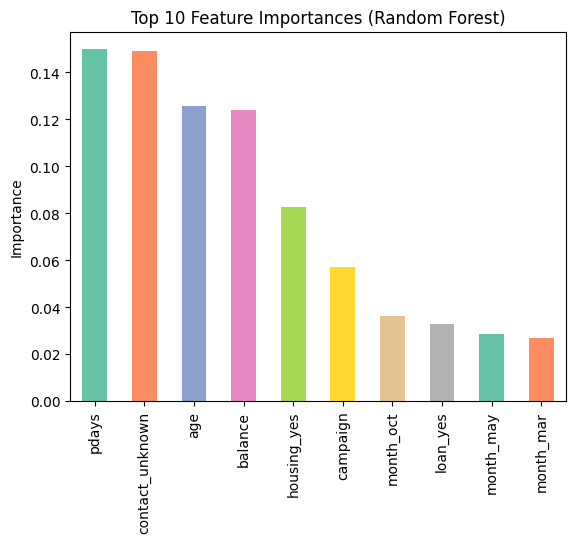

In [26]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.show()


Berdasarkan grafik di atas, fitur paling berpengaruh terhadap prediksi deposito berjangka adalah `pdays`, `contact_unknown`, `age`, dan `balance`.  Status ‘unknown’ ternyata sangat berpengaruh terhadap hasil prediksi, menandakan pentingnya kejelasan dan efektivitas channel komunikasi terhadap respon nasabah. Faktor-faktor ini menggambarkan pentingnya perilaku kontak sebelumnya, channel komunikasi, serta karakteristik demografis dan finansial nasabah. Insight dari feature importance dapat dimanfaatkan untuk menyusun strategi pemasaran yang lebih efektif dan tepat sasaran.

Ini membantu bisnis menentukan prioritas channel dan segmen nasabah pada campaign berikutnya.


## 11. Business Simulation & Cost-Benefit Analysis

Simulasi biaya dan revenue pada berbagai skenario batch targeting.


In [34]:
n_total = 10000            # batch campaign 10.000 nasabah
call_cost = 1              # Biaya call per nasabah: €1 
profit_per_deposit = 250   # Profit/keuntungan setiap 1 deposit baru: €250 (estimasi retail bank Eropa)
conv_baseline = 0.08       # Conversion rate tanpa model 
conv_model = 0.20          # Conversion rate dengan model

persen_target = [0.2, 0.3, 0.5, 0.7, 1.0]
results = []

for p in persen_target:
    n_targeted = int(p * n_total)
    deposits_targeted = n_targeted * conv_model
    revenue_targeted = deposits_targeted * profit_per_deposit
    cost_targeted = n_targeted * call_cost
    net_benefit_targeted = revenue_targeted - cost_targeted
    results.append({
        "Persen Target": f"{int(p*100)}%",
        "Net Benefit (EUR)": net_benefit_targeted,
        "Jumlah Deposit": int(deposits_targeted),
        "Biaya (EUR)": cost_targeted,
        "Revenue (EUR)": revenue_targeted
    })

cost_broadcast = n_total * call_cost
deposits_broadcast = n_total * conv_baseline
revenue_broadcast = deposits_broadcast * profit_per_deposit
net_benefit_broadcast = revenue_broadcast - cost_broadcast

import pandas as pd
df_benefit = pd.DataFrame(results)
df_benefit.loc[len(df_benefit)] = {
    "Persen Target": "100% (Tanpa Model)",
    "Net Benefit (EUR)": net_benefit_broadcast,
    "Jumlah Deposit": int(deposits_broadcast),
    "Biaya (EUR)": cost_broadcast,
    "Revenue (EUR)": revenue_broadcast
}
df_benefit = df_benefit[['Persen Target', 'Jumlah Deposit', 'Revenue (EUR)', 'Biaya (EUR)', 'Net Benefit (EUR)']]
df_benefit


,Persen Target,Jumlah Deposit,Revenue (EUR),Biaya (EUR),Net Benefit (EUR)
0,20%,400,100000.0,2000,98000.0
1,30%,600,150000.0,3000,147000.0
2,50%,1000,250000.0,5000,245000.0
3,70%,1400,350000.0,7000,343000.0
4,100%,2000,500000.0,10000,490000.0
5,100% (Tanpa Model),800,200000.0,10000,190000.0



- **Net Benefit** campaign akan optimal jika targeting batch (top 20%–50%) digunakan. Biaya jauh lebih efisien dibanding broadcast ke seluruh nasabah.
- **Jumlah Deposit** memang lebih banyak pada broadcast, namun biaya sangat tinggi sehingga net benefit tidak selalu maksimal.
- Dengan model prediksi, bank bisa menekan biaya marketing tanpa mengorbankan peluang konversi secara signifikan.
- Skenario hybrid (batch targeting + broadcast SMS/email) bisa dipertimbangkan untuk menjaga awareness sambil tetap efisien secara biaya.

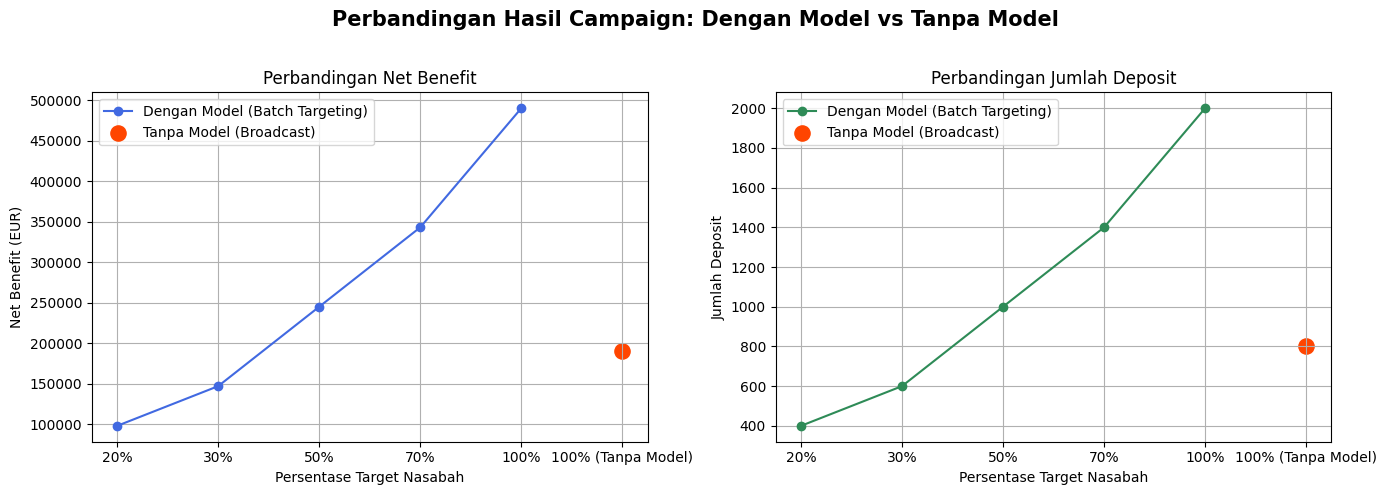

In [ ]:
df_with_model = df_benefit[df_benefit['Persen Target'] != "100% (Tanpa Model)"]
df_no_model = df_benefit[df_benefit['Persen Target'] == "100% (Tanpa Model)"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# Grafik Net Benefit
ax1.plot(df_with_model['Persen Target'], df_with_model['Net Benefit (EUR)'], 
         marker='o', label='Dengan Model (Batch Targeting)', color='royalblue')
ax1.scatter(df_no_model['Persen Target'], df_no_model['Net Benefit (EUR)'], 
            color='orangered', s=120, label='Tanpa Model (Broadcast)')
ax1.set_title('Perbandingan Net Benefit')
ax1.set_ylabel('Net Benefit (EUR)')
ax1.set_xlabel('Persentase Target Nasabah')
ax1.grid(True)
ax1.legend()

# Grafik Jumlah Deposit
ax2.plot(df_with_model['Persen Target'], df_with_model['Jumlah Deposit'], 
         marker='o', label='Dengan Model (Batch Targeting)', color='seagreen')
ax2.scatter(df_no_model['Persen Target'], df_no_model['Jumlah Deposit'], 
            color='orangered', s=120, label='Tanpa Model (Broadcast)')
ax2.set_title('Perbandingan Jumlah Deposit')
ax2.set_ylabel('Jumlah Deposit')
ax2.set_xlabel('Persentase Target Nasabah')
ax2.grid(True)
ax2.legend()

plt.suptitle('Perbandingan Hasil Campaign: Dengan Model vs Tanpa Model', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


- **Net Benefit:** Targeting batch dengan model (20–70%) menghasilkan net benefit lebih tinggi dibanding broadcast ke semua nasabah, karena biaya lebih efisien walau jumlah deposit absolut lebih rendah.
- **Jumlah Deposit:** Broadcast (tanpa model) memberi jumlah deposit terbanyak, tapi biaya sangat tinggi sehingga net benefit turun drastis.
- **Dampak Bisnis:** Model machine learning memungkinkan campaign lebih hemat, tetap efektif, dan memberi ROI lebih baik.  
Manajemen dapat memilih skenario batch/hybrid tergantung resource dan target revenue.


## **12.Conclusion and Recommendation**

**Executive Summary**

Analisis dan pemodelan dalam proyek *Bank Marketing Campaign* ini bertujuan membantu bank mengidentifikasi nasabah yang paling berpotensi melakukan deposito berjangka. Dengan membangun model klasifikasi berbasis data profil dan riwayat kampanye pemasaran, bank dapat memprioritaskan alokasi sumber daya dan merancang strategi yang lebih efektif, sehingga meningkatkan return on investment (ROI) dari setiap campaign.

Penggunaan metrik evaluasi seperti **Recall** dan **F1-Score** sangat penting, mengingat proporsi nasabah yang melakukan deposit jauh lebih sedikit (imbalanced data). Model dengan recall tinggi akan memastikan bank tidak kehilangan peluang dari nasabah potensial, sementara F1-Score menjaga keseimbangan antara precision dan recall agar model tidak bias pada salah satu kelas.

---

 **Limitasi**

1. **Keterbatasan Fitur:**  
   Dataset yang digunakan hanya mencakup variabel demografis dan riwayat kontak kampanye. Data perilaku finansial nasabah seperti histori transaksi, nilai rata-rata saldo bulanan, atau penggunaan channel digital belum tersedia sehingga model belum bisa menangkap potensi nasabah secara komprehensif.

2. **Data Imbalanced:**  
   Proporsi nasabah yang benar-benar melakukan deposit jauh lebih sedikit daripada yang tidak (imbalanced). Hal ini membuat model bisa cenderung bias ke kelas mayoritas jika tidak dilakukan penanganan khusus seperti balancing data atau pemilihan metrik yang tepat.

3. **Simulasi Cost & Benefit:**  
   Perhitungan biaya dan profit pada simulasi business impact menggunakan asumsi sederhana (fixed cost dan profit per deposit), bukan data aktual dari perusahaan. Akurasi analisis cost-be

4. **Feature Availability:**  
   Fitur seperti `duration` hanya tersedia setelah campaign, sehingga tidak bisa digunakan untuk prediksi pada campaign nyata.

---

**Rekomendasi**

1. **Peningkatan Data:**  
   Tambahkan data perilaku nasabah (misal: histori transaksi, penggunaan mobile banking) untuk memperkaya model prediksi.

2. **Penanganan Imbalanced Data:**  
   Terapkan teknik resampling (SMOTE, class weight, dsb) dan fokus pada metrik recall serta F1-Score.

3. **Strategi Campaign:**  
   Terapkan batch/hybrid targeting berdasarkan skor model, bukan lagi campaign massal tanpa segmentasi. Evaluasi secara rutin untuk menemukan titik optimal antara biaya dan konversi.

4. **Monitoring & Iterasi Model:**  
   Lakukan monitoring dan retraining model secara berkala agar tetap relevan dengan perilaku nasabah terbaru.

5. **A/B Testing:**  
   Uji efektivitas campaign dengan model machine learning vs campaign tradisional melalui A/B testing.

6. **Edukasi Stakeholder:**  
   Edukasi tim marketing dan manajemen bahwa model adalah alat bantu prioritas, bukan pengganti total campaign. Gunakan visualisasi dan simulasi untuk pengambilan keputusan yang objektif.

---


## Menyimpan Model Menggunakan Pickle


In [ ]:
import pickle

with open('rf_model_bank_marketing.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model berhasil disimpan ke rf_model_bank_marketing.pkl")


Model berhasil disimpan ke rf_model_bank_marketing.pkl
